<a href="https://colab.research.google.com/github/cksdlakstp12/deep_learning_study/blob/main/machine_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

In [ ]:
import numpy as np

def numerical_derivative(f, x):
  delta_x = 1e-4
  grad = np.zeros_like(x)

  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])

  while not it.finished:
    idx = it.multi_index

    tmp_val = x[idx]
    x[idx] = float(tmp_val) + delta_x
    fx1 = f(x)

    x[idx] = tmp_val - delta_x
    fx2 = f(x)
    grad[idx] = (fx1 - fx2) / (2*delta_x)

    x[idx] = tmp_val
    it.iternext()

  return grad

단일변수 데이터에 대한 선형회귀

In [ ]:
# 데이터 값 초기화
x_data = np.array([1,2,3,4,5]).reshape(5, 1)
t_data = np.array([2,3,4,5,6]).reshape(5, 1)

# 행렬값으로 데이터가 주어지면 아래처럼 분리하여 사용한다.
# raw_data = np.array([[1,2], [3,4], [5,6]])
# x = raw_data[:, 0].reshape(3, 1)
# print(x)

# W, b 초기화
W = np.random.rand(1, 1)
b = np.random.rand(1)
print("W = ", W, ", W.shape = ", W.shape, ", b = ", b, ", b.shape = ", b.shape)

# 손실함수 E(W, b) 정의
def error_val(x, t):
  y = np.dot(x, W) + b

  return (np.sum((t - y)**2)) / (len(x))

# 학습을 마친 후 값을 예측하기 위한 함수
def predict(x):
  y = np.dot(x, W) + b

  return y

# 학습 시키기
learning_rate = 1e-2

f = lambda x : error_val(x_data, t_data)

print("initial error value = ", error_val(x_data, t_data), "initial W = ", W, "\n", ", b = ", b)

for step in range(8001):
  W -= learning_rate*numerical_derivative(f, W)

  b -= learning_rate*numerical_derivative(f, b)

  if(step % 400 == 0):
    print("step = ", step, "error value = ", error_val(x_data, t_data), "W = ", W, "b = ", b)

W =  [[0.09212446]] , W.shape =  (1, 1) , b =  [0.04477643] , b.shape =  (1,)
initial error value =  15.182414724628032 initial W =  [[0.09212446]] 
 , b =  [0.04477643]
step =  0 error value =  8.967138037507674 W =  [[0.34917049]] b =  [0.10293067]
step =  400 error value =  0.005915818790132611 W =  [[1.0499464]] b =  [0.81972179]
step =  800 error value =  0.00037746421297051773 W =  [[1.01261638]] b =  [0.95446203]
step =  1200 error value =  2.408444834569828e-05 W =  [[1.00318688]] b =  [0.98849718]
step =  1600 error value =  1.536730191058976e-06 W =  [[1.000805]] b =  [0.99709441]
step =  2000 error value =  9.805247129682713e-08 W =  [[1.00020334]] b =  [0.99926605]
step =  2400 error value =  6.256327352246657e-09 W =  [[1.00005136]] b =  [0.99981461]
step =  2800 error value =  3.9919067231342553e-10 W =  [[1.00001297]] b =  [0.99995317]
step =  3200 error value =  2.5470724901871547e-11 W =  [[1.00000328]] b =  [0.99998817]
step =  3600 error value =  1.6251828305582999e-

학습에 대한 결과

In [ ]:
predict(43)

array([[44.]])

다변수 데이터에 대한 선형회귀

In [ ]:
loaded_data = np.array(
[[73,	80,	75,	152],
[93,	88,	93,	185],
[89,	91,	90,	180],
[96,	98,	100, 196],
[73,	66,	70,	142],
[53,	46,	55,	101],
[69,	74,	77,	149],
[47,	56,	60,	115],
[87,	79,	90,	175],
[79,	70,	88,	164],
[69,	70,	73,	141],
[70,	65,	74,	141],
[93,	95,	91,	184],
[79,	80,	73,	152],
[70,	73,	78,	148],
[93,	89,	96,	192],
[78,	75,	68,	147],
[81,	90,	93,	183],
[88,	92,	86,	177],
[78,	83,	77,	159],
[82,	86,	90,	177],
[86,	82,	89,	175],
[78,	83,	85,	175],
[76,	83,	71,	149],
[96,	93,	95,	192]])

# 데이터 분리
x_data = loaded_data[:, 0:-1]
t_data = loaded_data[:, [-1]]

# 가중치, 바이어스 초기화
W = np.random.rand(3, 1)
b = np.random.rand(1)

# 학습 시키기
learning_rate = 1e-5

f = lambda x : error_val(x_data, t_data)

print("initial error value = ", error_val(x_data, t_data), "initial W = ", W, "\n", ", b = ", b)

for step in range(10001):
  # 가중치 업데이트
  W -= learning_rate*numerical_derivative(f, W)
  # 바이어스 업데이트
  b -= learning_rate*numerical_derivative(f, b)

  if(step % 400 == 0):
    print("step = ", step, "error value = ", error_val(x_data, t_data), "W = ", W, "b = ", b)

initial error value =  586.9751644207256 initial W =  [[0.94124275]
 [0.49295048]
 [0.88508096]] 
 , b =  [0.13824975]
step =  0 error value =  223.9969126915746 W =  [[0.90277165]
 [0.45440214]
 [0.84573199]] b =  [0.13796016]
step =  400 error value =  10.089270413185375 W =  [[0.79644289]
 [0.39938134]
 [0.82534631]] b =  [0.13721525]
step =  800 error value =  9.31653873802194 W =  [[0.75414147]
 [0.40504113]
 [0.86093069]] b =  [0.13687221]
step =  1200 error value =  8.700015858381073 W =  [[0.71592984]
 [0.41126448]
 [0.89199014]] b =  [0.13648871]
step =  1600 error value =  8.206543548122433 W =  [[0.68140822]
 [0.41781829]
 [0.91914093]] b =  [0.13606983]
step =  2000 error value =  7.81042464587616 W =  [[0.65021657]
 [0.42452085]
 [0.94291045]] b =  [0.13561997]
step =  2400 error value =  7.491636238956842 W =  [[0.62203063]
 [0.43123226]
 [0.96375054]] b =  [0.13514295]
step =  2800 error value =  7.234496786670427 W =  [[0.59655815]
 [0.43784638]
 [0.98204887]] b =  [0.1

학습에 대한 결과

In [ ]:
predict(np.array([100, 98, 81]))

array([179.33623765])

# **Classification**

단일 변수 classification

In [ ]:
import numpy as np

x_data = np.array([2,4,6,8,10,12,14,16,18,20]).reshape(10, 1)
t_data = np.array([0,0,0,0,0,0,1,1,1,1]).reshape(10, 1)

W = np.random.rand(1, 1)
b = np.random.rand(1)

# sigmoid 함수(확률적인 값이 나오도록 함) 정의
def sigmoid(x):
  return 1 / (1+np.exp(-x))

# 손실함수 정의
def closs_entropy(x, t):
  # log 값이 0일때 무한대가 되는 것을 방지하는 역할
  delta = 1e-7

  z = np.dot(x, W) + b
  y = sigmoid(z)

  return -np.sum(t*np.log(y+delta) + (1-t)*np.log(1-y+delta))

def predict(x):
  z = np.dot(x, W) + b
  y = sigmoid(z)

  if y >= 0.5: result = 1
  else: result = 0

  return y, result

learning_rate = 1e-2

f = lambda x : closs_entropy(x_data, t_data)

for step in range(10001):
  
  W -= learning_rate*numerical_derivative(f, W)
  b -= learning_rate*numerical_derivative(f, b)

  if(step % 400 == 0):
    print("step = ", step, "error value = ", closs_entropy(x_data, t_data), "W = ", W, "b = ", b)

step =  0 error value =  8.194303612290408 W =  [[0.04891791]] b =  [0.50954889]
step =  400 error value =  3.075809006918589 W =  [[0.43407142]] b =  [-4.16874331]
step =  800 error value =  1.775150109703544 W =  [[0.45553621]] b =  [-5.67004601]
step =  1200 error value =  1.512988384520026 W =  [[0.53235799]] b =  [-6.69290144]
step =  1600 error value =  1.3491029295049894 W =  [[0.59332263]] b =  [-7.50241748]
step =  2000 error value =  1.2335109495214638 W =  [[0.64464838]] b =  [-8.18246182]
step =  2400 error value =  1.145892534600995 W =  [[0.68941558]] b =  [-8.77456013]
step =  2800 error value =  1.0762246496595103 W =  [[0.72939182]] b =  [-9.30251959]
step =  3200 error value =  1.018912213605995 W =  [[0.76569286]] b =  [-9.78135211]
step =  3600 error value =  0.970549892219292 W =  [[0.7990719]] b =  [-10.22118031]
step =  4000 error value =  0.9289281293946058 W =  [[0.83006343]] b =  [-10.62917923]
step =  4400 error value =  0.8925407274492655 W =  [[0.85906165]]

In [ ]:
(real_val, logical_val) = predict(3)

print(real_val, logical_val)

(real_val, logical_val) = predict(17)

print(real_val, logical_val)

[[1.11610862e-05]] 0
[[0.9912989]] 1


다변수 classification

In [ ]:
x_data = np.array([2,4,4,11,6,6,8,5,10,7,12,16,14,8,16,3,18,7]).reshape(9, 2)
t_data = np.array([0,0,0,0,1,1,1,1,1]).reshape(9, 1)

W = np.random.rand(2, 1)
b = np.random.rand(1)

# sigmoid 함수(확률적인 값이 나오도록 함) 정의
def sigmoid(x):
  return 1 / (1+np.exp(-x))

# 손실함수 정의
def closs_entropy(x, t):
  # log 값이 0일때 무한대가 되는 것을 방지하는 역할
  delta = 1e-7

  z = np.dot(x, W) + b
  y = sigmoid(z)

  return -np.sum(t*np.log(y+delta) + (1-t)*np.log(1-y+delta))

def predict(x):
  z = np.dot(x, W) + b
  y = sigmoid(z)

  if y >= 0.5: result = 1
  else: result = 0

  return y, result

learning_rate = 1e-2

f = lambda x : closs_entropy(x_data, t_data)

for step in range(80001):
  
  W -= learning_rate*numerical_derivative(f, W)
  b -= learning_rate*numerical_derivative(f, b)

  if(step % 400 == 0):
    print("step = ", step, "error value = ", closs_entropy(x_data, t_data), "W = ", W, "b = ", b)

step =  0 error value =  20.884071742874628 W =  [[0.01569609]
 [0.72925104]] b =  [0.37098096]
step =  400 error value =  2.231682064605912 W =  [[ 0.42561913]
 [-0.08364285]] b =  [-2.70343155]
step =  800 error value =  1.5749200322094783 W =  [[ 0.54005897]
 [-0.02472298]] b =  [-4.31255978]
step =  1200 error value =  1.2711506683534914 W =  [[0.62637437]
 [0.01012238]] b =  [-5.41107396]
step =  1600 error value =  1.092555266672408 W =  [[0.69619197]
 [0.03507406]] b =  [-6.25424012]
step =  2000 error value =  0.9726978393344226 W =  [[0.75511517]
 [0.05500765]] b =  [-6.94517749]
step =  2400 error value =  0.8852602016755068 W =  [[0.80624893]
 [0.07210172]] b =  [-7.53535597]
step =  2800 error value =  0.8177317592174582 W =  [[0.85149585]
 [0.08748766]] b =  [-8.05400323]
step =  3200 error value =  0.763391928402125 W =  [[0.89211023]
 [0.10181156]] b =  [-8.5192382]
step =  3600 error value =  0.7182972260760591 W =  [[0.92896641]
 [0.11546591]] b =  [-8.94303596]
step =

In [ ]:
test_data = np.array([3, 17])

print(predict(test_data))

test_data = np.array([5, 8])

print(predict(test_data))

test_data = np.array([7, 21])

print(predict(test_data))

test_data = np.array([12, 0])

print(predict(test_data))

(array([0.12868307]), 0)
(array([0.00099027]), 0)
(array([0.99998955]), 1)
(array([0.6349916]), 1)


# **Machine Learning XOR Problem**

Gate Class 

In [ ]:
class LogicGate:
  def __init__(self, gate_name, xdata, tdata):
    self.name = gate_name

    self.__xdata = xdata.reshape(4,2)
    self.__tdata = tdata.reshape(4,1)

    self.__W = np.random.rand(2,1)
    self.__b = np.random.rand(1)

    self.__learning_rate = 1e-2

  def __loss_func(self):
    delta = 1e-7

    z = np.dot(self.__xdata, self.__W) + self.__b
    y = sigmoid(z)

    return -np.sum(self.__tdata * np.log(y + delta) + (1 - self.__tdata)*np.log((1 - y) + delta))

  def error_val(self):
    delta = 1e-7

    z = np.dot(self.__xdata, self.__W) + self.__b
    y = sigmoid(z)

    return -np.sum(self.__tdata * np.log(y + delta) + (1 - self.__tdata)*np.log((1 - y) + delta))

  def train(self):
    f = lambda x : self.__loss_func()

    print("Initial error value = ", self.error_val())

    for step in range(8001):

      self.__W -= self.__learning_rate * numerical_derivative(f, self.__W)

      self.__b -= self.__learning_rate * numerical_derivative(f, self.__b)

      if(step % 400 == 0):
        print("step = ", step, "error value = ", self.error_val(), " W = ", self.__W, " b = ", self.__b)


  def predict(self, input_data):
    z = np.dot(input_data, self.__W) + self.__b
    y = sigmoid(z)

    if y > 0.5: result = 1
    else: result = 0

    return y, result


AND GATE

In [ ]:
xdata = np.array([[0,0], [0,1],[1,0],[1,1]])
tdata = np.array([0,0,0,1])

AND_obj = LogicGate("AND_GATE", xdata, tdata)

AND_obj.train()

Initial error value =  4.077746819217756
step =  0 error value =  4.034906941529735  W =  [[0.13806487]
 [0.35592748]]  b =  [0.76057495]
step =  400 error value =  1.6380175587137926  W =  [[0.72158722]
 [0.80909367]]  b =  [-1.58348991]
step =  800 error value =  1.193435315140189  W =  [[1.42840842]
 [1.46734658]]  b =  [-2.49618219]
step =  1200 error value =  0.9501239242287737  W =  [[1.93390072]
 [1.95263925]]  b =  [-3.18928175]
step =  1600 error value =  0.7926080110431439  W =  [[2.33275236]
 [2.34242753]]  b =  [-3.75409133]
step =  2000 error value =  0.680697636466389  W =  [[2.66529168]
 [2.67060155]]  b =  [-4.23331815]
step =  2400 error value =  0.596494657833529  W =  [[2.95189101]
 [2.95496212]]  b =  [-4.65061935]
step =  2800 error value =  0.5306240917113841  W =  [[3.20436068]
 [3.20621899]]  b =  [-5.02062445]
step =  3200 error value =  0.4776105925777948  W =  [[3.43025343]
 [3.43142265]]  b =  [-5.35312411]
step =  3600 error value =  0.4340029394935403  W =

In [ ]:
print(AND_obj.name, '\n')

test_data = np.array([[0,0],[0,1],[1,0],[1,1]])

for input_data in test_data:
  (sigmoid_val, logical_val) = AND_obj.predict(input_data)
  print(input_data, " = ", logical_val, "\n")

AND_GATE 

[0 0]  =  0 

[0 1]  =  0 

[1 0]  =  0 

[1 1]  =  1 



OR GATE

In [ ]:
xdata = np.array([[0,0], [0,1],[1,0],[1,1]])
tdata = np.array([0,1,1,1])

OR_obj = LogicGate("OR_GATE", xdata, tdata)

OR_obj.train()

print(OR_obj.name, '\n')

test_data = np.array([[0,0],[0,1],[1,0],[1,1]])

for input_data in test_data:
  (sigmoid_val, logical_val) = OR_obj.predict(input_data)
  print(input_data, " = ", logical_val, "\n")

Initial error value =  1.6551931737976397
step =  0 error value =  1.652963339516028  W =  [[0.71878936]
 [0.96770009]]  b =  [0.94198679]
step =  400 error value =  1.0717345619022527  W =  [[1.60483611]
 [1.75122904]]  b =  [0.00768689]
step =  800 error value =  0.7824231987219963  W =  [[2.30646826]
 [2.39546966]]  b =  [-0.48469458]
step =  1200 error value =  0.6108090985427186  W =  [[2.85563708]
 [2.91342639]]  b =  [-0.82251019]
step =  1600 error value =  0.4981129881942807  W =  [[3.3022152 ]
 [3.34200217]]  b =  [-1.08064814]
step =  2000 error value =  0.4189066097413615  W =  [[3.6768756 ]
 [3.70560962]]  b =  [-1.28979266]
step =  2400 error value =  0.3604613123782732  W =  [[3.99872445]
 [4.02029109]]  b =  [-1.46558421]
step =  2800 error value =  0.3157179202863021  W =  [[4.28030221]
 [4.29700285]]  b =  [-1.61713023]
step =  3200 error value =  0.28045860226811253  W =  [[4.53023698]
 [4.54350509]]  b =  [-1.75023058]
step =  3600 error value =  0.25201587239080725

NAND GATE

In [ ]:
xdata = np.array([[0,0], [0,1],[1,0],[1,1]])
tdata = np.array([1,1,1,0])

NAND_obj = LogicGate("NAND_GATE", xdata, tdata)

NAND_obj.train()

print(NAND_obj.name, '\n')

test_data = np.array([[0,0],[0,1],[1,0],[1,1]])

for input_data in test_data:
  (sigmoid_val, logical_val) = NAND_obj.predict(input_data)
  print(input_data, " = ", logical_val, "\n")

Initial error value =  2.8179561210347774
step =  0 error value =  2.81152785896797  W =  [[0.81191909]
 [0.17807282]]  b =  [0.55305314]
step =  400 error value =  1.6310731730834644  W =  [[-0.64121084]
 [-0.91087013]]  b =  [1.60581019]
step =  800 error value =  1.1888023072459686  W =  [[-1.39711724]
 [-1.51738374]]  b =  [2.50963446]
step =  1200 error value =  0.9470206938142207  W =  [[-1.92165835]
 [-1.97961578]]  b =  [3.19988907]
step =  1600 error value =  0.7904150170573181  W =  [[-2.32870434]
 [-2.35866356]]  b =  [3.76293136]
step =  2000 error value =  0.6790687197728777  W =  [[-2.66493056]
 [-2.6813886 ]]  b =  [4.24092879]
step =  2400 error value =  0.5952363053191737  W =  [[-2.95322627]
 [-2.96275315]]  b =  [4.65731397]
step =  2800 error value =  0.5296221789056373  W =  [[-3.20646686]
 [-3.21223565]]  b =  [5.02660476]
step =  3200 error value =  0.47679378606348366  W =  [[-3.43268286]
 [-3.43631475]]  b =  [5.35852927]
step =  3600 error value =  0.433324318

<h3>XOR GATE 1</h3><br>
=> Linear한 선을 그려서는 XOR을 전부 충족할 수 없고 절반만 충족함

<img src="https://t1.daumcdn.net/cfile/tistory/99612E4B5C0B73DD34?download">

[ 출처 : https://trendy00develope.tistory.com/35 ]


해결 방법 1 : 레이어를 Deep하게 쌓는다.

해결 방법 2 : NAND, OR, AND 게이트를 이용한다.

In [ ]:
xdata = np.array([[0,0], [0,1],[1,0],[1,1]])
tdata = np.array([0,1,1,0])

XOR_obj = LogicGate("XOR_GATE", xdata, tdata)

XOR_obj.train()

print(XOR_obj.name, '\n')

test_data = np.array([[0,0],[0,1],[1,0],[1,1]])

for input_data in test_data:
  (sigmoid_val, logical_val) = XOR_obj.predict(input_data)
  print(input_data, " = ", logical_val, "\n")

Initial error value =  3.2156363181011063
step =  0 error value =  3.205279273797954  W =  [[0.94183138]
 [0.58149682]]  b =  [0.02638807]
step =  400 error value =  2.7885889881128336  W =  [[0.30389175]
 [0.16986146]]  b =  [-0.27907417]
step =  800 error value =  2.7769800444735537  W =  [[0.15066846]
 [0.10140189]]  b =  [-0.14937628]
step =  1200 error value =  2.7738121856041  W =  [[0.07618824]
 [0.05808495]]  b =  [-0.07956291]
step =  1600 error value =  2.77293202228317  W =  [[0.03907351]
 [0.03242185]]  b =  [-0.04236301]
step =  2000 error value =  2.7726850499747853  W =  [[0.02025401]
 [0.01781004]]  b =  [-0.02255385]
step =  2400 error value =  2.7726153959963216  W =  [[0.01058127]
 [0.00968331]]  b =  [-0.01200722]
step =  2800 error value =  2.772595701512968  W =  [[0.00555915]
 [0.00522923]]  b =  [-0.00639235]
step =  3200 error value =  2.7725901260551478  W =  [[0.00293234]
 [0.00281112]]  b =  [-0.00340313]
step =  3600 error value =  2.772588546714202  W =  [

XOR GATE 2

In [ ]:
input_data = np.array([[0,0], [0,1],[1,0],[1,1]])

s1 = [] # NAND 출력
s2 = [] # OR 출력

new_input_data = [] # AND 입력
final_output = [] # AND 출력

for index in range(len(input_data)):

  s1 = NAND_obj.predict(input_data[index])
  s2 = OR_obj.predict(input_data[index])
  
  new_input_data.append(s1[-1])
  new_input_data.append(s2[-1])

  (sigmoid_val, logical_val) = AND_obj.predict(np.array(new_input_data))

  final_output.append(logical_val)
  new_input_data = []

for index in range(len(input_data)):
  print(input_data[index], " = ", final_output[index], end='')
  print("\n")

[0 0]  =  0

[0 1]  =  1

[1 0]  =  1

[1 1]  =  0



<h1>Deep Learning</h1>

XOR 문제 해결

In [ ]:
class LogicGate:
  def __init__(self, gate_name, xdata, tdata):
    self.name = gate_name

    self.__xdata = xdata.reshape(4,2)
    self.__tdata = tdata.reshape(4,1)

    self.__W2 = np.random.rand(2,6)
    self.__b2 = np.random.rand(6)

    self.__W3 = np.random.rand(6,1)
    self.__b3 = np.random.rand(1)

    self.__learning_rate = 1e-2


  def feed_forward(self):
    delta = 1e-7

    z2 = np.dot(self.__xdata, self.__W2) + self.__b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, self.__W3) + self.__b3
    y = a3 = sigmoid(z3)

    return -np.sum(self.__tdata * np.log(y + delta) + (1 - self.__tdata)*np.log((1 - y) + delta))

  def loss_func(self):
    delta = 1e-7

    z2 = np.dot(self.__xdata, self.__W2) + self.__b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, self.__W3) + self.__b3
    y = a3 = sigmoid(z3)

    return -np.sum(self.__tdata * np.log(y + delta) + (1 - self.__tdata)*np.log((1 - y) + delta))

  def train(self):
    f = lambda x : self.loss_func()

    print("Initial error value = ", self.feed_forward())

    for step in range(10001):

      self.__W2 -= self.__learning_rate * numerical_derivative(f, self.__W2)

      self.__b2 -= self.__learning_rate * numerical_derivative(f, self.__b2)

      self.__W3 -= self.__learning_rate * numerical_derivative(f, self.__W3)

      self.__b3 -= self.__learning_rate * numerical_derivative(f, self.__b3)

      if(step % 400 == 0):
        print("step = ", step, "error value = ", self.loss_func())


  def predict(self, input_data):

    z2 = np.dot(input_data, self.__W2) + self.__b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, self.__W3) + self.__b3
    y = a3 = sigmoid(z3)

    if y > 0.5: result = 1
    else: result = 0

    return y, result


In [ ]:
xdata = np.array([[0,0], [0,1],[1,0],[1,1]])
tdata = np.array([0,1,1,0])

XOR_obj = LogicGate("XOR_GATE", xdata, tdata)

XOR_obj.train()

print(XOR_obj.name, '\n')

test_data = np.array([[0,0],[0,1],[1,0],[1,1]])

for input_data in test_data:
  (sigmoid_val, logical_val) = XOR_obj.predict(input_data)
  print(input_data, " = ", logical_val, "\n")

Initial error value =  4.7876202317284555
step =  0 error value =  4.690502568886616
step =  400 error value =  2.773333504231356
step =  800 error value =  2.7715196323202558
step =  1200 error value =  2.769752489434355
step =  1600 error value =  2.7679026473237176
step =  2000 error value =  2.7658359019082317
step =  2400 error value =  2.7633937224316028
step =  2800 error value =  2.760369960268089
step =  3200 error value =  2.7564791964262008
step =  3600 error value =  2.751311268811511
step =  4000 error value =  2.744265824166166
step =  4400 error value =  2.7344613170274554
step =  4800 error value =  2.72061533117345
step =  5200 error value =  2.700894718659558
step =  5600 error value =  2.67272991595714
step =  6000 error value =  2.632595411298812
step =  6400 error value =  2.5758638925956077
step =  6800 error value =  2.4971369362854356
step =  7200 error value =  2.391642016655775
step =  7600 error value =  2.2573877767310595
step =  8000 error value =  2.095970

<h1>MNIST (필기체숫자) 인식</h1>

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data_name = "/content/drive/MyDrive/mnist datas/mnist_train.csv"
test_data_name = "/content/drive/MyDrive/mnist datas/mnist_test.csv"

training_data = np.loadtxt(train_data_name, delimiter=',',dtype=np.float32)
test_data = np.loadtxt(test_data_name, delimiter=',', dtype=np.float32)

print("training_data.shape = ", training_data.shape, ", test_data.shape", test_data.shape)

training_data.shape =  (60000, 785) , test_data.shape (10000, 785)


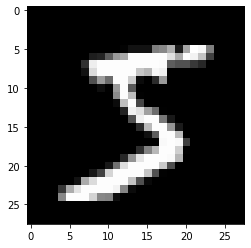

In [ ]:
img = training_data[0][1:].reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
class NeuralNetwork:

  def __init__(self, input_nodes, hidden_nodes, output_nodes):

    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes

    self.W2 = np.random.rand(self.input_nodes, self.hidden_nodes)
    self.b2 = np.random.rand(self.hidden_nodes)

    self.W3 = np.random.rand(self.hidden_nodes, self.output_nodes)
    self.b3 = np.random.rand(self.output_nodes)

    self.learning_rate = 1e-4


  def feed_forward(self):
    delta = 1e-7

    z1 = np.dot(self.input_data, self.W2) + self.b2
    a1 = sigmoid(z1)

    z2 = np.dot(a1, self.W3) + self.b3
    y = sigmoid(z2)

    return -np.sum(self.target_data * np.log(y + delta) + (1 - self.target_data)*np.log((1 - y) + delta))

  def train(self, training_data):

    self.target_data = np.zeros(output_nodes) + 0.01
    self.target_data[int(training_data[0])] = 0.99

    self.input_data = (training_data[1:] / 255.0 * 0.99) + 0.01

    f = lambda x : self.feed_forward()

    self.W2 -= self.learning_rate * numerical_derivative(f, self.W2)

    self.b2 -= self.learning_rate * numerical_derivative(f, self.b2)

    self.W3 -= self.learning_rate * numerical_derivative(f, self.W3)

    self.b3 -= self.learning_rate * numerical_derivative(f, self.b3)

  def predict(self, input_data):

    z2 = np.dot(input_data, self.W2) + self.b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, self.W3) + self.b3
    y = sigmoid(z3)

    predicted_num = np.argmax(y)

    return predicted_num

  def accuracy(self, test_data):
    matched_list = []
    not_matched_list = []

    for index in range(len(test_data)):
      label = int(test_data[index, 0])

      data = (test_data[index, 1:] / 255.0 * 0.99) + 0.01

      predicted_num = self.predict(data)

      if label == predicted_num:
        matched_list.append(index)
      else:
        not_matched_list.append(index)

    print("Current Accuracy = ", 100*(len(matched_list)/(len(test_data))), " %")

    return matched_list, not_matched_list


In [ ]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes)

for step in range(30001):
  index = np.random.randint(0, len(training_data) - 1)
  
  nn.train(training_data[index])

  if step % 400 == 0:
    print("step = ", step, ", loss_val = ", nn.feed_forward())

step =  0 , loss_val =  143.77341309854825


KeyboardInterrupt: ignored

<h1>오차역전파</h1>

수치미분을 통해서 가중치와 바이어스 업데이트 시에는 많은 시간이 소요 된다.

오차역전파 공식을 통해서 가중치와 바이어스를 수치미분 공식을 이용하지 않고 곱의 형태로 나타내서 속도를 향상할 수 있다.

따라서 오차역전파 공식을 이용해 위의 MNIST 모델을 더 빠르게 학습할 수 있도록 리모델링 하겠다.

In [ ]:
from datetime import datetime

class NeuralNetwork:

  def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):

    self.input_nodes = input_nodes
    self.hidden_nodes = hidden_nodes
    self.output_nodes = output_nodes

    self.W2 = np.random.rand(self.input_nodes, self.hidden_nodes) / np.sqrt(self.input_nodes/2)
    self.b2 = np.random.rand(self.hidden_nodes)

    self.W3 = np.random.rand(self.hidden_nodes, self.output_nodes) / np.sqrt(self.hidden_nodes/2)
    self.b3 = np.random.rand(self.output_nodes)

    self.Z3 = np.zeros([1, output_nodes])
    self.A3 = np.zeros([1, output_nodes])

    self.Z2 = np.zeros([1, hidden_nodes])
    self.A2 = np.zeros([1, hidden_nodes])

    self.Z1 = np.zeros([1, input_nodes])
    self.A1 = np.zeros([1, input_nodes])

    self.learning_rate = learning_rate


  def feed_forward(self):
    delta = 1e-7

    self.Z1 = self.input_data
    self.A1 = self.input_data

    self.Z2 = np.dot(self.A1, self.W2) + self.b2
    self.A2 = sigmoid(self.Z2)

    self.Z3 = np.dot(self.A2, self.W3) + self.b3
    self.A3 = sigmoid(self.Z3)

    return -np.sum(self.target_data * np.log(self.A3 + delta) + (1 - self.target_data)*np.log((1 - self.A3) + delta))

  def loss_val(self):
    delta = 1e-7

    self.Z1 = self.input_data
    self.A1 = self.input_data

    self.Z2 = np.dot(self.A1, self.W2) + self.b2
    self.A2 = sigmoid(self.Z2)

    self.Z3 = np.dot(self.A2, self.W3) + self.b3
    self.A3 = sigmoid(self.Z3)

    return -np.sum(self.target_data * np.log(self.A3 + delta) + (1 - self.target_data)*np.log((1 - self.A3) + delta))

  def train(self, input_data, target_data):

    self.target_data = target_data
    self.input_data = input_data

    loss_val = self.feed_forward()

    # 역전파 공식에 의한 유도이다. 이유는 다시 자세히 보도록하자.
    loss_3 = (self.A3-self.target_data) * self.A3 * (1-self.A3)

    self.W3 = self.W3 - self.learning_rate * np.dot(self.A2.T, loss_3)

    self.b3 = self.b3 - self.learning_rate * loss_3

    loss_2 = np.dot(loss_3, self.W3.T) * self.A2 * (1-self.A2)

    self.W2 = self.W2 - self.learning_rate * np.dot(self.A1.T, loss_2)

    self.b2 = self.b2 - self.learning_rate * loss_2

  def predict(self, input_data):

    z2 = np.dot(input_data, self.W2) + self.b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, self.W3) + self.b3
    y = sigmoid(z3)

    predicted_num = np.argmax(y)

    return predicted_num

  def accuracy(self, test_data):
    matched_list = []
    not_matched_list = []

    for index in range(len(test_data)):

      label = int(test_data[index, 0])

      data = (test_data[index, 1:] / 255.0 * 0.99) + 0.01

      predicted_num = self.predict(np.array(data, ndmin=2))


      if label == predicted_num:
        matched_list.append(index)
      else:
        not_matched_list.append(index)

    print("Current Accuracy = ", 100*(len(matched_list)/(len(test_data))), " %")

    return matched_list, not_matched_list


In [ ]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.3
epochs = 5

nn = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

start_time = datetime.now()

for i in range(epochs):
  for step in range(len(training_data)):

    target_data = np.zeros(output_nodes) + 0.01
    target_data[int(training_data[step, 0])] = 0.99

    input_data = ((training_data[step, 1:] / 255.0) * 0.99) + 0.01
    
    nn.train(np.array(input_data, ndmin=2), np.array(target_data, ndmin=2))

    # if step % 400 == 0:
    #   print("step = ", step, ", loss_val = ", nn.loss_val())

end_time = datetime.now()
print("\nelapsed time = ", end_time - start_time)

KeyboardInterrupt: ignored

In [ ]:
(a, b) = nn.accuracy(test_data)
#  epochs = 1 : 90.55  %
#  epochs = 5 : 91.81  %

<h1>텐서플로우 기초</h1>

코랩에서는 %tensorflow_version 1.x 를 이용해서 버전을 다운그레이드 할 수 있다.

마찬가지로 %tensorflow_version 2.x 를 이용해서 2.x 버전을 사용할 수 있으나,

현재 최신 버전이 2.x이므로 나중에 3.x 버전이 나온다면 사용하자.

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf

a = tf.constant(1.0, name='a')
b = tf.constant(2.0, name='b')
c = tf.constant([[1.0, 2.0], [3.0, 4.0]])

print(a)
print(a+b)
print(c)

sess = tf.Session()

print(sess.run([a, b]))
print(sess.run(c))
print(sess.run([a+b]))
print(sess.run(c+1.0))

sess.close()

TensorFlow is already loaded. Please restart the runtime to change versions.
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)


AttributeError: ignored

In [ ]:
# 플레이스 홀더는 바로 값을 지정하지 않고
# 나중에 값을 지정 받을 수 있도록하는 노드를 생성하는
# 일종의 변수 생성 함수 느낌
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
c = a+b

sess = tf.Session()

# run 함수의 첫번째 파라메터는 수행할 연산
# feed_dict는 플레이스 홀더로 지정한 노드에 값을 대입시킴
print(sess.run(c, feed_dict={a:1.0, b:3.0}))
print(sess.run(c, feed_dict={a:[1.0,2.0], b:[3.0,4.0]}))

d = 100*c

print(sess.run(d, feed_dict={a:1.0, b:3.0}))
print(sess.run(d, feed_dict={a:[1.0,2.0], b:[3.0,4.0]}))

sess.close()

In [ ]:
W1 = tf.Variable(tf.random_normal([1]))
b1 = tf.Variable(tf.random_normal([1]))

W2 = tf.Variable(tf.random_normal([1, 2]))
b2 = tf.Variable(tf.random_normal([1, 2]))

sess = tf.Session()
# 변수 노드들을 초기화 해줌
sess.run(tf.global_variables_initializer())

for step in range(3):
  W1 = W1 - step
  b1 = b1 - step

  W2 = W2 - step
  b2 = b2 - step

  print("step = ", step, ", W1 = ", sess.run(W1), ", b1 = ", sess.run(b1))
  print("step = ", step, ", W2 = ", sess.run(W2), ", b2 = ", sess.run(b1))

sess.close()

step =  0 , W1 =  [1.4349954] , b1 =  [0.03288762]
step =  0 , W2 =  [[-0.59635735  0.09051114]] , b2 =  [0.03288762]
step =  1 , W1 =  [0.4349954] , b1 =  [-0.96711236]
step =  1 , W2 =  [[-1.5963573  -0.90948886]] , b2 =  [-0.96711236]
step =  2 , W1 =  [-1.5650046] , b1 =  [-2.9671123]
step =  2 , W2 =  [[-3.5963573 -2.909489 ]] , b2 =  [-2.9671123]


In [ ]:
import numpy as np

loaded_data = np.array(
[[73,	80,	75,	152],
[93,	88,	93,	185],
[89,	91,	90,	180],
[96,	98,	100, 196],
[73,	66,	70,	142],
[53,	46,	55,	101],
[69,	74,	77,	149],
[47,	56,	60,	115],
[87,	79,	90,	175],
[79,	70,	88,	164],
[69,	70,	73,	141],
[70,	65,	74,	141],
[93,	95,	91,	184],
[79,	80,	73,	152],
[70,	73,	78,	148],
[93,	89,	96,	192],
[78,	75,	68,	147],
[81,	90,	93,	183],
[88,	92,	86,	177],
[78,	83,	77,	159],
[82,	86,	90,	177],
[86,	82,	89,	175],
[78,	83,	85,	175],
[76,	83,	71,	149],
[96,	93,	95,	192]])

x_data = loaded_data[:, 0:-1]
t_data = loaded_data[:, [-1]]

W = tf.Variable(tf.random_normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))

X = tf.placeholder(tf.float32, [None, 3])
T = tf.placeholder(tf.float32, [None, 1])

y = tf.matmul(X, W) + b

# 평균 제곱 오차 정의(reduce_mean은 평균을 내주는 함수)
loss = tf.reduce_mean(tf.square(y - T))

learning_rate = 1e-5

optimizer = tf.train.GradientDescentOptimizer(learning_rate)

# 오차를 최소화하도록 하는 최적화 프로그램 정의
train = optimizer.minimize(loss)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for step in range(8001):
    loss_val, y_val, _ = sess.run([loss, y, train], feed_dict={X:x_data, T:t_data})

    if step % 400 == 0:
      print("step = ", step, ", loss_val = ", loss_val)

  print("\nPrediction is ", sess.run(y, feed_dict={X: [ [100, 98, 81] ]}))

step =  0 , loss_val =  268882.7
step =  400 , loss_val =  51.74098
step =  800 , loss_val =  39.495667
step =  1200 , loss_val =  30.651203
step =  1600 , loss_val =  24.237522
step =  2000 , loss_val =  19.566319
step =  2400 , loss_val =  16.14813
step =  2800 , loss_val =  13.6342325
step =  3200 , loss_val =  11.775485
step =  3600 , loss_val =  10.393384
step =  4000 , loss_val =  9.359696
step =  4400 , loss_val =  8.581998
step =  4800 , loss_val =  7.9933233
step =  5200 , loss_val =  7.5450106
step =  5600 , loss_val =  7.2015376
step =  6000 , loss_val =  6.9368553
step =  6400 , loss_val =  6.731713
step =  6800 , loss_val =  6.5718737
step =  7200 , loss_val =  6.44666
step =  7600 , loss_val =  6.3481236
step =  8000 , loss_val =  6.2702236

Prediction is  [[180.85518]]


In [ ]:
loaded_data = np.loadtxt("/content/drive/MyDrive/딥러닝 강의 자료/neowizard-master/MachineLearning/diabetes.csv", delimiter=',')

x_data = loaded_data[:,0:-1]
t_data = loaded_data[:,[-1]]

print("loaded_data = ", loaded_data.shape)
print("x_data = ", x_data.shape, ", t_data = ", t_data.shape)

X = tf.placeholder(tf.float32, [None, 8])
T = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random_normal([8, 1]))
b = tf.Variable(tf.random_normal([1]))

z = tf.matmul(X, W) + b

y = tf.sigmoid(z)

loss = -tf.reduce_mean(T*tf.log(y) + (1-T)*tf.log(1-y))

learning_rate = 0.01

optimizer = tf.train.GradientDescentOptimizer(learning_rate)

train = optimizer.minimize(loss)

# cast는 첫번째 파라메터가 True면 1을, False면 0으로 변환해주는 함수
predicted = tf.cast(y > 0.5, dtype=tf.float32)

# 예측값과 실제 데이터를 비교해 0과 1로 변환 후 
# 평균을 내서 정확도를 검증하는 부분
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, T), dtype=tf.float32))

with tf.Session() as sess:

  sess.run(tf.global_variables_initializer())

  for step in range(20001):

    loss_val, _ = sess.run([loss, train], feed_dict={X:x_data, T:t_data})

    if step % 500 == 0:
      print("step = ", step, ", loss_val = ", loss_val)

  y_val, predicted_val, accuracy_val = sess.run([y, predicted, accuracy], feed_dict={X: x_data, T: t_data})\
  
  print("\ny_val.shape = ", y_val.shape, ", predicted_val = ", predicted_val.shape)
  print("\nAccuracy = ", accuracy_val)

loaded_data =  (759, 9)
x_data =  (759, 8) , t_data =  (759, 1)
step =  0 , loss_val =  1.3911625
step =  500 , loss_val =  0.7756136
step =  1000 , loss_val =  0.69652444
step =  1500 , loss_val =  0.64218885
step =  2000 , loss_val =  0.60221344
step =  2500 , loss_val =  0.57289034
step =  3000 , loss_val =  0.5513024
step =  3500 , loss_val =  0.5352739
step =  4000 , loss_val =  0.5232385
step =  4500 , loss_val =  0.51408476
step =  5000 , loss_val =  0.50702864
step =  5500 , loss_val =  0.5015158
step =  6000 , loss_val =  0.49715182
step =  6500 , loss_val =  0.4936536
step =  7000 , loss_val =  0.4908158
step =  7500 , loss_val =  0.48848805
step =  8000 , loss_val =  0.48655868
step =  8500 , loss_val =  0.48494393
step =  9000 , loss_val =  0.48358035
step =  9500 , loss_val =  0.48241913
step =  10000 , loss_val =  0.4814225
step =  10500 , loss_val =  0.4805612
step =  11000 , loss_val =  0.47981152
step =  11500 , loss_val =  0.47915512
step =  12000 , loss_val =  0.4785

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

print("\n", mnist.train.num_examples, mnist.test.num_examples, mnist.validation.num_examples)

print("\ntrain image shape = ", np.shape(mnist.train.images))
print("train label shape = ", np.shape(mnist.train.labels))
print("test image shape = ", np.shape(mnist.test.images))
print("test label shape = ", np.shape(mnist.test.labels))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [ ]:
learning_rate = 0.1
epochs = 100
batch_size = 100

input_nodes = 784
hidden_nodes = 100
output_nodes = 10

X = tf.placeholder(tf.float32, [None, input_nodes])
T = tf.placeholder(tf.float32, [None, output_nodes])

W2 = tf.Variable(tf.random_normal([input_nodes, hidden_nodes]))
b2 = tf.Variable(tf.random_normal([hidden_nodes]))

W3 = tf.Variable(tf.random_normal([hidden_nodes, output_nodes]))
b3 = tf.Variable(tf.random_normal([output_nodes]))

Z2 = tf.matmul(X, W2) + b2
A2 = tf.nn.relu(Z2)

Z3 = logits = tf.matmul(A2, W3) + b3

y = A3 = tf.nn.softmax(Z3)

# loss = tf.reduce_mean(-(T*tf.log(softmax(Z3)) + (1-T)*tf.log(1-softmax(Z3))))
# 위의 식과 아래의 식은 같다.
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z3, labels=T))

optimizer = tf.train.GradientDescentOptimizer(learning_rate)

train = optimizer.minimize(loss)

predicted_val = tf.equal(tf.argmax(A3, 1), tf.argmax(T, 1))

accuracy = tf.reduce_mean(tf.cast(predicted_val, dtype=tf.float32))

with tf.Session() as sess:

  sess.run(tf.global_variables_initializer())
  
  for i in range(epochs):

    total_batch = int(mnist.train.num_examples / batch_size)

    for step in range(total_batch):
      # batch_size 만큼의 데이터를 임의로 뽑아서
      # batch_x_data, batch_t_data에 각각 대입해줌
      batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)

      loss_val, _ = sess.run([loss, train], feed_dict={X:batch_x_data, T: batch_t_data})

      if step % 100 == 0:
        print("step = ", step, ", loss_val = ", loss_val)

  test_x_data = mnist.test.images
  test_t_data = mnist.test.labels

  accuracy_val = sess.run(accuracy, feed_dict={X:test_x_data, T: test_t_data})
  predicted = sess.run(predicted_val, feed_dict={X:test_x_data, T: test_t_data})

  print("\npredicted = ", predicted)
  print("\nAccuracy = ", accuracy_val)


step =  0 , loss_val =  133.10918
step =  100 , loss_val =  3.5327537
step =  200 , loss_val =  4.977753
step =  300 , loss_val =  3.350122
step =  400 , loss_val =  2.239846
step =  500 , loss_val =  2.2090857
step =  0 , loss_val =  1.2507958
step =  100 , loss_val =  1.2794678
step =  200 , loss_val =  0.44986352
step =  300 , loss_val =  1.5978242
step =  400 , loss_val =  1.0930991
step =  500 , loss_val =  1.4487315
step =  0 , loss_val =  0.67526007
step =  100 , loss_val =  1.1012994
step =  200 , loss_val =  0.4104523
step =  300 , loss_val =  1.1344705
step =  400 , loss_val =  0.6048766
step =  500 , loss_val =  0.62077594
step =  0 , loss_val =  0.50286895
step =  100 , loss_val =  0.8208871
step =  200 , loss_val =  0.86970305
step =  300 , loss_val =  0.346918
step =  400 , loss_val =  0.3797512
step =  500 , loss_val =  0.2309642
step =  0 , loss_val =  0.25129312
step =  100 , loss_val =  0.2534806
step =  200 , loss_val =  0.675978
step =  300 , loss_val =  0.27918315


KeyboardInterrupt: ignored

<h1>CNN</h1>

In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime

mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

print("\n", mnist.train.num_examples, mnist.test.num_examples, mnist.validation.num_examples)

print("\ntrain image shape = ", np.shape(mnist.train.images))
print("train label shape = ", np.shape(mnist.train.labels))
print("test image shape = ", np.shape(mnist.test.images))
print("test label shape = ", np.shape(mnist.test.labels))

ModuleNotFoundError: ignored

In [ ]:
learning_rate = 0.001
epochs = 30
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784])

T = tf.placeholder(tf.float32, [None, 10])

A1 = X_img = tf.reshape(X, [-1, 28, 28, 1])

F2 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))
b2 = tf.Variable(tf.constant(0.1, shape=[32]))

C2 = tf.nn.conv2d(A1, F2, strides=[1,1,1,1], padding="SAME")

Z2 = tf.nn.relu(C2 + b2)

A2 = P2 = tf.nn.max_pool(Z2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")

F3 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))
b3 = tf.Variable(tf.constant(0.1, shape=[64]))

C3 = tf.nn.conv2d(A2, F3, strides=[1,1,1,1], padding="SAME")

Z3 = tf.nn.relu(C3 + b3)

A3 = P3 = tf.nn.max_pool(Z3, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")

F4 = tf.Variable(tf.random_normal([3,3,64,128], stddev=0.01))
b4 = tf.Variable(tf.constant(0.1, shape=[128]))

C4 = tf.nn.conv2d(A3, F4, strides=[1,1,1,1], padding="SAME")

Z4 = tf.nn.relu(C4 + b4)

A4 = P4 = tf.nn.max_pool(Z4, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")

A4_flat = P4_flat = tf.reshape(A4, [-1, 128*4*4])

W5 = tf.Variable(tf.random_normal([128*4*4, 10], stddev=0.01))
b5 = tf.Variable(tf.random_normal([10]))

Z5 = logits = tf.matmul(A4_flat, W5) + b5

y = A5 = tf.nn.softmax(Z5)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z5, labels=T))

train = tf.train.AdamOptimizer(learning_rate).minimize(loss)

predicted_val = tf.equal(tf.argmax(A5, 1), tf.argmax(T, 1))

accuracy = tf.reduce_mean(tf.cast(predicted_val, dtype=tf.float32))

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())

  start_time = datetime.now()

  for i in range(epochs):

    total_batch = int(mnist.train.num_examples / batch_size)

    for step in range(total_batch):

      batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)

      loss_val, _ = sess.run([loss, train], feed_dict={X: batch_x_data, T: batch_t_data})

      if step % 100 == 0:
        print("epochs = ", i, ", step = ", step, ", loss_val", loss_val)

  end_time = datetime.now()

  print("\nelapsed time = ", end_time - start_time)

  test_x_data = mnist.test.images
  test_t_data = mnist.test.labels

  accuracy_val = sess.run(accuracy, feed_dict={X: test_x_data, T: test_t_data})

  print("\nAccuracy = ", accuracy_val)

<h1>RNN</h1>

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
import numpy as np

idx2char = ["g", "o", "h", "m", "e"]

x_data = [[0,1,2,1,3]]

x_one_hot = [[[1,0,0,0],
              [0,1,0,0],
              [0,0,1,0],
              [0,1,0,0],
              [0,0,0,1]]]

t_data = [[1,2,1,3,4]]

num_classes = 5
input_dim = 4
hidden_size = 5
batch_size = 1
sequence_length = 5
learning_rate = 0.1

X = tf.placeholder(tf.float32, [None, sequence_length, input_dim])
T = tf.placeholder(tf.int32, [None, sequence_length])

cell = tf.contrib.rnn.BasicRNNCell(num_units=hidden_size)

initial_state = cell.zero_state(batch_size, tf.float32)  

outputs, _states = tf.nn.dynamic_rnn(cell, X, initial_state=initial_state, dtype=tf.float32)

weights = tf.ones([batch_size, sequence_length])

seq_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs, targets=T, weights=weights)

loss = tf.reduce_mean(seq_loss)

train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

y = prediction = tf.argmax(outputs, axis=2)

with tf.Session() as sess:
  
  sess.run(tf.global_variables_initializer())

  for step in range(2001):

    loss_val, _ = sess.run([loss, train], feed_dict={X: x_one_hot, T: t_data})

    result = sess.run(y, feed_dict={X: x_one_hot})

    if step % 400 == 0:
      print("step = ", step, ", loss = ", loss_val, ", prediction = ", result, ", target = ", t_data)

      result_str = [idx2char[c] for c in np.squeeze(result)]

      print("Prediction = ", ''.join(result_str))
      print()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
step =  0 , loss =  1.6024787 , prediction =  [[1 0 3 0 4]] , target =  [[1, 2, 1, 3, 4]]
Prediction =  ogmge

step =  400 , loss =  0.453442 , prediction =  [[1 2 1 3 4]] , target =  [[1, 2, 1, 3, 4]]
Prediction = 

<h1>Transfer Learning</h1>

미리 학습되어있는 모델(pretraining model)에 우리의 데이터를 추가적으로 학습해서 가중치와 바이어스 등의 값을 조금 조정한다(fine tuning). 모델을 처음부터 구축할 경우 생기는 매우 긴 학급시간을 거치지 않아도 금방 고해상도의 사진을 학습할 수 있다. Google Inception model과 MS ResNet model등이 오픈 소스로 배포되고 있다.

아나콘다 다운로드해서 다시해봐야 할듯함. 구글 드라이드로 되는지 확인이 안됨. 또한 하모니카 os에서 flower_photos.zip 파일을 압축풀기하면 오류가 발생함. 윈도우에서 시도해볼것.

드라이브를 이용해서 시도해볼 경우 아래의 경로를 추가하여 명령어들의 경로를 수정해줄것.
(/content/drive/MyDrive/딥러닝 강의 자료/neowizard-master/MachineLearning)

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [ ]:
# Training Data들을 재학습시킴(파인 튜닝). 파인 튜닝으로 학습된 가중치와 바이어스등의 학습결과는 /tmp에 저장됨.
!python  ./retrain.py --image_dir=./flower_photos

In [ ]:
# 학습된 내용을 바탕으로 이미지 분류를 수행 (해바라기 사진 분류 test)
!python ./label_image.py --graph=/tmp/output_graph.pb --labels=/tmp/output_labels.txt --input_layer=Placeholder --output_layer=final_result --image=./sunflower5.jpg

In [ ]:
# 학습된 내용을 바탕으로 이미지 분류를 수행 (장미 사진 분류 test)
!python ./label_image.py --graph=/tmp/output_graph.pb --labels=/tmp/output_labels.txt --input_layer=Placeholder --output_layer=final_result --image=./rose2.jpg

In [ ]:
# 학습된 내용을 바탕으로 이미지 분류를 수행 (튤립 사진 분류 test)
!python ./label_image.py --graph=/tmp/output_graph.pb --labels=/tmp/output_labels.txt --input_layer=Placeholder --output_layer=final_result --image=./tulip5.jpg

<h1>Google Colab 사용법</h1>

일반적인 리눅스 명령어 사용가능

In [ ]:
!pwd
!ls

/content
drive  sample_data


In [ ]:
# 로컬 PC의 파일 업로드 방법
from google.colab import files

uploaded  = files.upload()

for fn in uploaded.keys():
  print("User uploaded file '{name}'  with length {length} bytes".format(name = fn, lenth = len(uploaded[fn])))

KeyboardInterrupt: ignored

In [ ]:
# 코랩에 있는 파일을 로컬 PC로 다운로드 하는 방법
files.download("파일이름.확장자")